In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

url1="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_245f649a53f34cf39252fa83811ebef3.csv"
missing_values = ["XXXXXXX"]
df1=pd.read_csv(url1,header=None,na_values = missing_values)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,winter,small_,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [3]:
df1.shape

(200, 18)

In [4]:
df1.isna().any()

0     False
1     False
2     False
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
dtype: bool

In [5]:
df1_sub=df1.iloc[:,3:18].astype(float)
df1_sub.dtypes

3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
dtype: object

In [6]:
df1_sub.isna().any()

3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
dtype: bool

In [7]:
df1_sub=df1_sub.fillna(df1_sub.median())
df1_sub.isna().any()

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder
df1_o=df1.iloc[:,0:3]
df1_o=df1_o.apply(LabelEncoder().fit_transform)
df1_o.head()

,0,1,2
0,3,2,2
1,1,2,2
2,0,2,2
3,1,2,2
4,0,2,2


In [9]:
df1=pd.concat([df1_o,df1_sub],axis=1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3,2,2,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,1,2,2,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,0,2,2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,1,2,2,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,0,2,2,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [10]:
X=df1.iloc[:,0:11]
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3,2,2,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0
1,1,2,2,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3
2,0,2,2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6
3,1,2,2,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4
4,0,2,2,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5


In [11]:
y=df1.iloc[:,11:18]
y.head()

,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,9.2,2.9,7.5,0.0,7.5,4.1,1.0


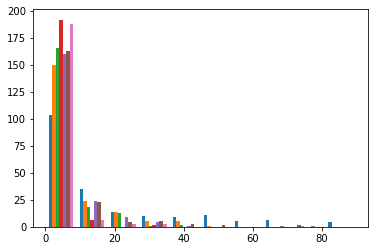

In [12]:
plt.hist(y)
plt.show()

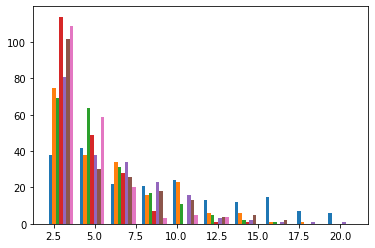

In [13]:
plt.hist(2*(np.sqrt(y)+1))
plt.show()

In [14]:
y=2*(np.sqrt(y)+1)
y.head()

,11,12,13,14,15,16,17
0,2.000000,2.000000,2.000000,2.00000,13.696153,7.761944,2.000000
1,4.366432,7.513620,6.381780,4.75681,7.176872,2.000000,4.898275
2,5.633180,16.642404,4.756810,2.00000,2.000000,2.000000,8.228965
3,5.521363,14.806248,10.694826,2.00000,4.366432,2.000000,4.366432
4,8.066300,5.405877,7.477226,2.00000,7.477226,6.049691,4.000000


In [15]:
y0=pd.DataFrame(y.iloc[:,0])
y0.head()

,11
0,2.000000
1,4.366432
2,5.633180
3,5.521363
4,8.066300


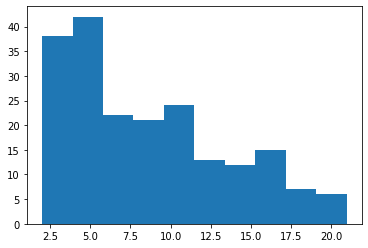

In [16]:
import matplotlib.pyplot as plt
plt.hist(y0)
plt.show()

In [18]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
model=GradientBoostingRegressor(n_estimators=6000,min_samples_split=3,min_samples_leaf=1,max_features="sqrt",max_depth=26,loss="lad",learning_rate=0.001,criterion="mse",subsample=0.95,validation_fraction=0.2,random_state=0).fit(X,y0)
model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.001, loss='lad', max_depth=26,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=6000,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=0.95, tol=0.0001, validation_fraction=0.2,
             verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import r2_score
yhat=model.predict(X)
print("R-squared for train data is: ",r2_score(y0,yhat))

R-squared for train data is:  0.9839755307028164


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
mse=mse(y0,yhat)
print("The root mean square error for train data is: ", np.sqrt(mse))

The root mean square error for train data is:  0.6550044940419621


In [23]:
print ("Root mean square error in original scale is: ",np.power((np.sqrt(mse))*2-1,2))

Root mean square error in original scale is:  0.09610557269281872


Test data.

In [24]:
url2="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_79ddb41351694bda9e313fd7273e57df.csv"
missing_values = ["XXXXXXX"]
df2=pd.read_csv(url2,header=None,na_values = missing_values)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,summer,small_,medium,7.95,5.7,57.333,2.460,273.33301,295.66699,380.000,NaN,1.2,36.5,1.9,0.0,1.2,0.0,28.0
1,winter,small_,medium,7.98,8.8,59.333,7.392,286.66699,33.33300,138.000,7.1,1.2,0.0,0.0,0.0,23.2,46.4,0.0
2,summer,small_,medium,8.00,7.2,80.000,1.957,174.28600,47.85700,113.714,4.5,7.0,23.0,6.5,1.4,21.2,0.0,2.1
3,spring,small_,high__,8.35,8.4,68.000,3.026,458.00000,45.20000,111.800,3.2,1.4,38.2,2.4,0.0,4.8,1.0,1.2
4,spring,small_,medium,8.10,13.2,19.000,0.000,130.00000,6.00000,40.000,2.0,3.9,55.4,8.4,0.0,0.0,0.0,0.0


In [25]:
df2.shape

(140, 18)

In [26]:
df2.isna().any()

0     False
1     False
2     False
3      True
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13    False
14    False
15     True
16     True
17     True
dtype: bool

In [27]:
df2_sub=df2.iloc[:,3:18].astype(float)
df2_sub=df2_sub.fillna(df2_sub.median())
df2_sub.isna().any()

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [28]:
from sklearn.preprocessing import LabelEncoder
df2_o=df2.iloc[:,0:3]
df2_o=df2_o.apply(LabelEncoder().fit_transform)
df2_o.head()

,0,1,2
0,2,2,2
1,3,2,2
2,2,2,2
3,1,2,0
4,1,2,2


In [29]:
df2=pd.concat([df2_o,df2_sub],axis=1)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2,2,2,7.95,5.7,57.333,2.460,273.33301,295.66699,380.000,4.6,1.2,36.5,1.9,0.0,1.2,0.0,28.0
1,3,2,2,7.98,8.8,59.333,7.392,286.66699,33.33300,138.000,7.1,1.2,0.0,0.0,0.0,23.2,46.4,0.0
2,2,2,2,8.00,7.2,80.000,1.957,174.28600,47.85700,113.714,4.5,7.0,23.0,6.5,1.4,21.2,0.0,2.1
3,1,2,0,8.35,8.4,68.000,3.026,458.00000,45.20000,111.800,3.2,1.4,38.2,2.4,0.0,4.8,1.0,1.2
4,1,2,2,8.10,13.2,19.000,0.000,130.00000,6.00000,40.000,2.0,3.9,55.4,8.4,0.0,0.0,0.0,0.0


In [30]:
X_test=df2.iloc[:,0:11]
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,2,2,7.95,5.7,57.333,2.460,273.33301,295.66699,380.000,4.6
1,3,2,2,7.98,8.8,59.333,7.392,286.66699,33.33300,138.000,7.1
2,2,2,2,8.00,7.2,80.000,1.957,174.28600,47.85700,113.714,4.5
3,1,2,0,8.35,8.4,68.000,3.026,458.00000,45.20000,111.800,3.2
4,1,2,2,8.10,13.2,19.000,0.000,130.00000,6.00000,40.000,2.0


In [31]:
y_test=df2.iloc[:,11:18]
y_test.head()

,11,12,13,14,15,16,17
0,1.2,36.5,1.9,0.0,1.2,0.0,28.0
1,1.2,0.0,0.0,0.0,23.2,46.4,0.0
2,7.0,23.0,6.5,1.4,21.2,0.0,2.1
3,1.4,38.2,2.4,0.0,4.8,1.0,1.2
4,3.9,55.4,8.4,0.0,0.0,0.0,0.0


In [32]:
y_test=2*(np.sqrt(y_test)+1)
y_test.head()

,11,12,13,14,15,16,17
0,4.190890,14.083046,4.756810,2.000000,4.190890,2.000000,12.583005
1,4.190890,2.000000,2.000000,2.000000,11.633276,15.623509,2.000000
2,7.291503,11.591663,7.099020,4.366432,11.208692,2.000000,4.898275
3,4.366432,14.361230,5.098387,2.000000,6.381780,4.000000,4.190890
4,5.949684,16.886235,7.796551,2.000000,2.000000,2.000000,2.000000


In [33]:
y0_test=pd.DataFrame(y_test.iloc[:,0])
y0_test.head()

,11
0,4.190890
1,4.190890
2,7.291503
3,4.366432
4,5.949684


In [36]:
ythat=model.predict(X_test)
print("R-squared for test data is: ",r2_score(y0_test,ythat))

R-squared for test data is:  0.6228078300587738
